# Economic reforms in 1984-1990s: A possible relationship to child poverty

The very simple question this analysis asks is whether the economic reforms of the 1980-1990s period such that they form a switchpoint from one set-point of child poverty levels to another, higher, setpoint. The rationale for this argument is both theoretically and empirically driven. 

The reforms at the end of the 1980s and their relative merits still are debated. As these debates are somewhat uninteresting to the writer, it would be preferable to read from an expert from that era, [Brian Easton](https://www.eastonbh.ac.nz/1994/10/economic_and_other_ideas_behind_the_new_zealand_reforms/)

There are a number of theorists who postulate that economic reforms toward a market economy increase rates of child poverty. The representative arguments are from the intuitive (a less caring society) to the complex in terms of economic theory. It appears that the arguments also are sustained from some datasources. 

Empirically, the first argument that the reforms, termed locally as 'Rogernomics', is that rates of poverty (percentage of an index population under 17) appear sigmoidal when inspecting the data. See Figure 1 below. The implication of this shape is that there was a lower rate prior to some date in the 1990s and a higher one later. The intervening slope between the two rates is viewed as representing an increase in the prevalence of child poverty.

The data examined here are from Figure 2. of the [Child Poverty Monitor](http://nzchildren.co.nz/), downloaded from B Perry's 2017 [report](http://www.msd.govt.nz/about-msd-and-our-work/publications-resources/monitoring/household-incomes/index.html),  Table F.7. I note that Figures 1-6 **all** indicate a rise around 1990 in whichever measure of poverty is used. Furthermore, selection of data from Figure 2 is limited by the fact that from 2008, data are a rolling mean. The data are, however, probably the best available but nonetheless quite poor and somewhat arbitrary indices. That better or more clear measures can and ought to be used is something the Prime Minister, Ms Adern, is addressing. 

The analysis itself is an unashamed copy of the canonical analysis of [coal-mining disasters](https://pymc-devs.github.io/pymc/tutorial.html). Poverty rate (as a standardised percentage) appears to equate to death rates conceptually well enough for this initial foray. 

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm

In [2]:
ydata = np.array([14,15,11,13,16,27,29,28,28,30,28,25,27,28,28,27,24,29,28,25])
year = np.array([1982,1984,1986,1988,1990,1992,1994,1996,1998,2001,2004,2008,2009,2010,2011,2012,2013,2014,2015,2016])

<IPython.core.display.Javascript object>


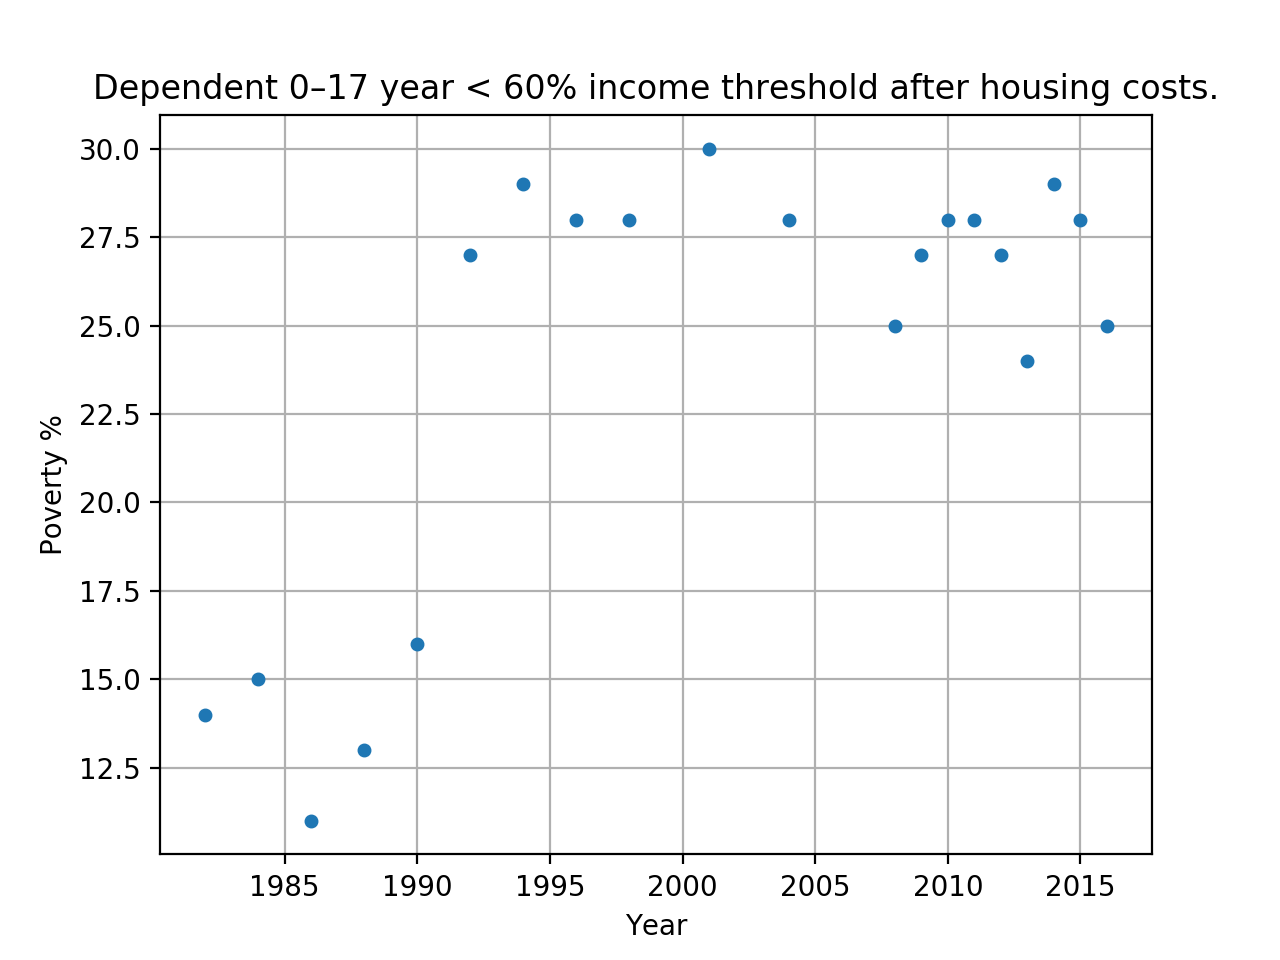

In [3]:
fig, ax0 = plt.subplots()
ax0.plot(year, ydata, 'o', markersize=4);
ax0.set_title("Dependent 0–17 year < 60% income threshold after housing costs.")
ax0.set_ylabel("Poverty %")
ax0.set_xlabel("Year")
ax0.grid()

In [4]:
with pm.Model() as poverty_model:

    switchpoint = pm.DiscreteUniform('switchpoint', lower=year.min(), upper=year.max(), testval=1996)

    # Priors for pre- and post-switch rates number of disasters
    early_rate = pm.Exponential('early_rate', 1)
    late_rate = pm.Exponential('late_rate', 1)

    # Allocate appropriate Poisson rates to years before and after current
    rate = pm.math.switch(switchpoint >= year, early_rate, late_rate)

    poverty = pm.Poisson('poverty', rate, observed=ydata)

with poverty_model:
    trace = pm.sample(10000)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [switchpoint]
>NUTS: [late_rate_log__, early_rate_log__]
 99%|█████████▉| 10399/10500 [00:08<00:00, 1191.70it/s]/Users/Llewelyn_home/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
100%|██████████| 10500/10500 [00:08<00:00, 1191.14it/s]
/Users/Llewelyn_home/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
Tuning was enabled throughout the whole trace.
Tuning was enabled throughout the whole trace.
The number of effective samples is smaller than 25% for some parameters.


<IPython.core.display.Javascript object>


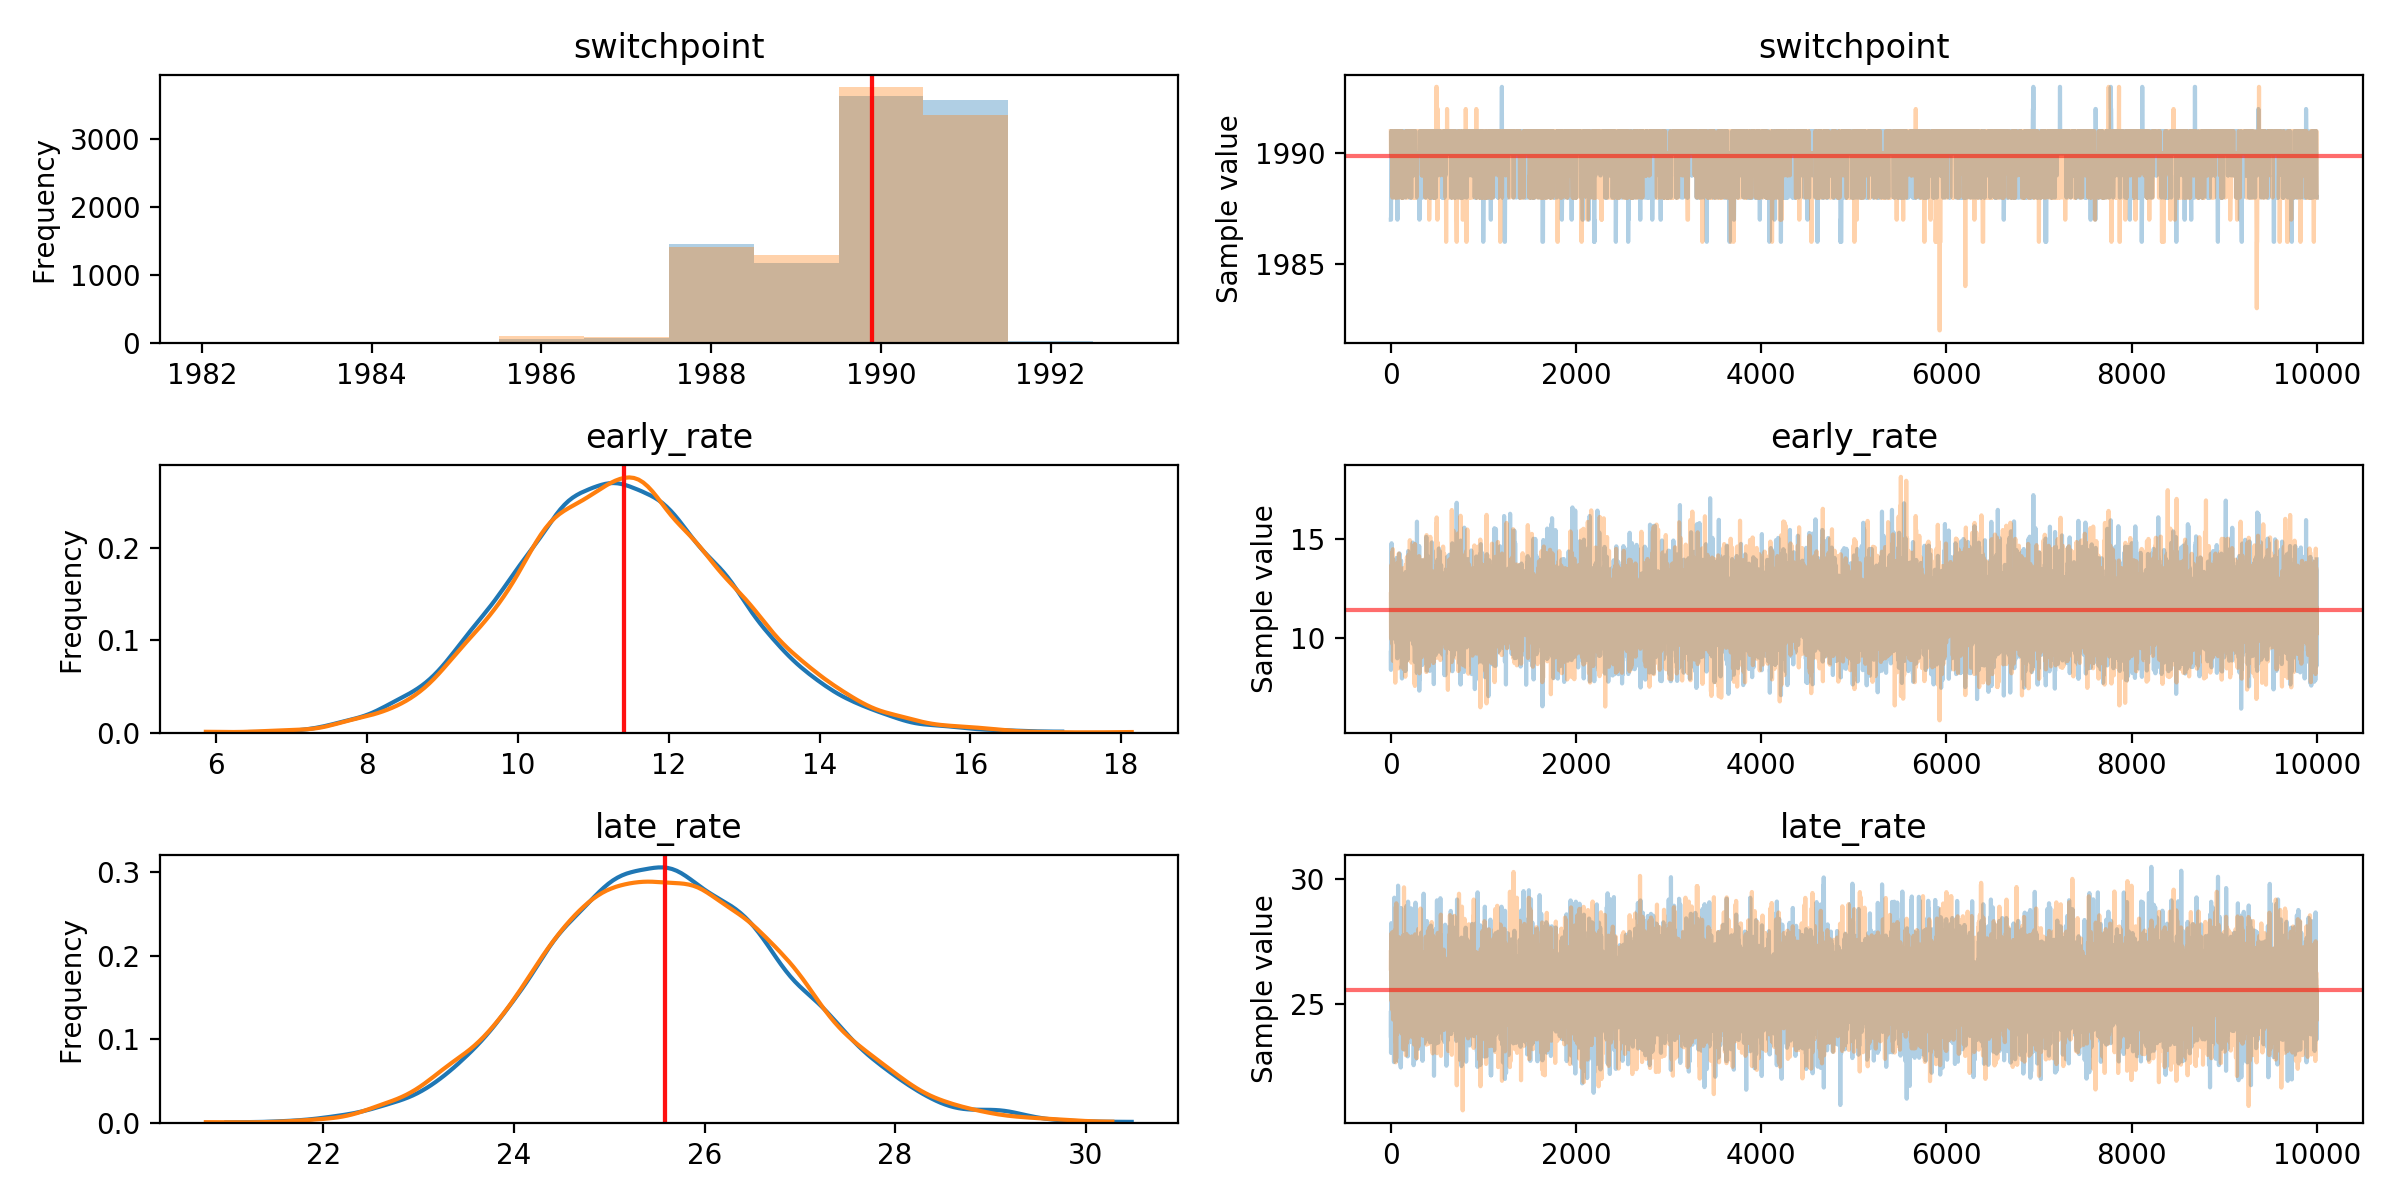

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1248df128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x124835b38>]], dtype=object)

In [5]:
pm.traceplot(trace, lines={'early_rate':trace.early_rate.mean(),
                                        'late_rate':trace.late_rate.mean(),
                                        'switchpoint':trace.switchpoint.mean()})
# plt.show()

In [6]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
switchpoint,1989.889050,1.120152,0.018334,1988.000000,1991.000000,2982.0,1.000454
early_rate,11.407031,1.480409,0.015085,8.612853,14.447192,10230.0,1.000068
late_rate,25.581718,1.283887,0.009752,23.101674,28.081016,14435.0,0.999952


A question arising is whether child poverty has had any significant changes in rate post the higher rate cica 1990. The next cells examine this using only data from 1992 onward. Using the same approach, it is difficult to get convergence on the sampler, probably indicating that there is not a definitive change, even though the plot indicates a possible lowering since 2005. 

## Conclusion

The Bayesian approach suggests that there was a fundamental change in the rate of child poverty, defined as the number of dependent 17 year olds living within an adjusted for household income less than 60% of the median. The specific estimate indicates a 95% level of confidence that the change occurred between 1988-1991. It seems that one can also be 95% confident that the rate shifted upward from 8.6-14.4% to 23.1-28.2%. 

The question, indeed the big question, is whether the (failed) attempts since 2000 by successive Labour and National dominated approaches can ever have worked in the absence of a reversal of the more fundamental economic drivers. From the current back-of-envelope look at the data, once suspects not. 

Further work in this area is in need of: 
* A robust definition of poverty and an accompanying indicator variable.
* Careful consideration of the fundamental, not surface, economic drivers of poverty.
* Focus on macro-level social intervention, as opposed to periphery-management and resource shifting without disruption of the causative factors.
* Compassion.